In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import bernoulli, binom, describe
from statsmodels.stats import power as pwr
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
import math as ma

In [3]:
# Installing plotnine package
# $ pip install plotnine

# Does RJ Barrett have 🪣 potential ?

<div class="alert alert-block alert-info">

### Was RJ's sophmore year shooting improvement exaggerated or legitimate?
    
</div>

In [4]:
# Thank you to basketballreference.com for game log stats
# Loading game logs for RJ Barrett's rookie and sophmore seasons
RJ_season1stats = pd.read_excel('RJ_szn1.xlsx')
RJ_season1stats.head()

,Date,Age,Tm,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
0,2019-10-23,19-131,NYK,9,13,1,3,2,4,0,5,5,2,2,0,3,3,21,-2
1,2019-10-25,19-133,NYK,7,16,2,4,0,3,0,3,3,3,6,0,5,4,16,0
2,2019-10-26,19-134,NYK,9,21,4,6,4,7,3,4,7,3,0,0,4,3,26,-9
3,2019-10-28,19-136,NYK,7,15,0,2,5,11,6,9,15,5,0,1,2,3,19,5
4,2019-10-30,19-138,NYK,4,11,1,4,0,2,0,2,2,2,0,0,2,2,9,-20


In [5]:
RJ_season1stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    56 non-null     datetime64[ns]
 1   Age     56 non-null     object        
 2   Tm      56 non-null     object        
 3   FG      56 non-null     int64         
 4   FGA     56 non-null     int64         
 5   3P      56 non-null     int64         
 6   3PA     56 non-null     int64         
 7   FT      56 non-null     int64         
 8   FTA     56 non-null     int64         
 9   ORB     56 non-null     int64         
 10  DRB     56 non-null     int64         
 11  TRB     56 non-null     int64         
 12  AST     56 non-null     int64         
 13  STL     56 non-null     int64         
 14  BLK     56 non-null     int64         
 15  TOV     56 non-null     int64         
 16  PF      56 non-null     int64         
 17  PTS     56 non-null     int64         
 18  +/-     56 n

In [6]:
RJ_season1stats['FG_pct'] = round(RJ_season1stats['FG'] / RJ_season1stats['FGA'],3)
RJ_season1stats['3P_pct'] = round(RJ_season1stats['3P'] / RJ_season1stats['3PA'],3)

In [7]:
RJ_season1stats.head()

,Date,Age,Tm,FG,FGA,3P,3PA,FT,FTA,ORB,...,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,FG_pct,3P_pct
0,2019-10-23,19-131,NYK,9,13,1,3,2,4,0,...,5,2,2,0,3,3,21,-2,0.692,0.333
1,2019-10-25,19-133,NYK,7,16,2,4,0,3,0,...,3,3,6,0,5,4,16,0,0.438,0.500
2,2019-10-26,19-134,NYK,9,21,4,6,4,7,3,...,7,3,0,0,4,3,26,-9,0.429,0.667
3,2019-10-28,19-136,NYK,7,15,0,2,5,11,6,...,15,5,0,1,2,3,19,5,0.467,0.000
4,2019-10-30,19-138,NYK,4,11,1,4,0,2,0,...,2,2,0,0,2,2,9,-20,0.364,0.250


In [8]:
RJ_season2stats = pd.read_excel('RJ_szn2.xlsx')
RJ_season2stats.head()

,Date,Age,Tm,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
0,2020-12-23,20-192,NYK,11,15,3,3,1,2,0,8,8,5,0,0,1,3,26,-10
1,2020-12-26,20-195,NYK,2,15,0,6,6,8,1,5,6,4,0,0,4,0,10,-16
2,2020-12-27,20-196,NYK,7,17,0,4,3,4,2,6,8,4,1,0,2,4,17,21
3,2020-12-29,20-198,NYK,4,15,0,3,4,4,1,6,7,2,2,0,2,2,12,1
4,2020-12-31,20-200,NYK,4,19,0,8,4,5,2,6,8,3,1,0,2,2,12,-20


In [9]:
RJ_season2stats['FG_pct'] = round(RJ_season2stats['FG'] / RJ_season2stats['FGA'],3)
RJ_season2stats['3P_pct'] = round(RJ_season2stats['3P'] / RJ_season2stats['3PA'],3)

In [10]:
# Create array for each season
rook_szn = RJ_season1stats['FG_pct'].values
soph_szn = RJ_season2stats['FG_pct'].values

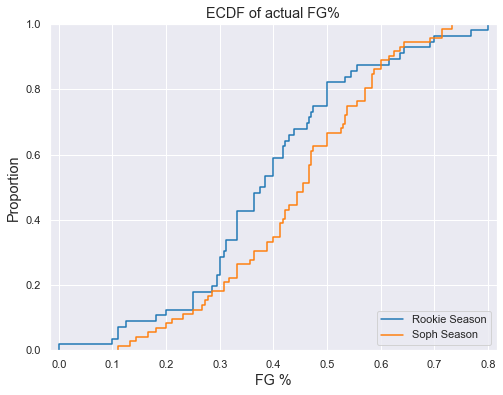

In [19]:
sns.set_context('notebook')
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (8,6))
sns.ecdfplot(data=rook_szn)
sns.ecdfplot(data=soph_szn)

plt.xlabel('FG %', fontsize= 'large')
plt.ylabel('Proportion', fontsize= 'large')
plt.title('ECDF of actual FG%', fontsize= 'large')
plt.legend(('Rookie Season', 'Soph Season'), loc= 'lower right')
plt.margins(0.02)
plt.show()

## Was this observed difference in shooting performance just by chance?

<div class="alert alert-block alert-info">

- In order to determine the appropriate statistical test to assess if there was significant difference between RJ's rookie and sophmore seasons, first the distribution of FG% for each year needs to be checked for its adherence or departure from normal distribution

    
- To assess the normality of each season's FG% distrbution we will use Q-Q plot and perform a Shapiro-Wilks test
    
    
- Both test are based on same underlying principle, each compares the values in the sample with the distribution of values expected for a normal distribution. For Shapiro-Wilks a test statistic value of 1 represents perfect normality
    
</div>

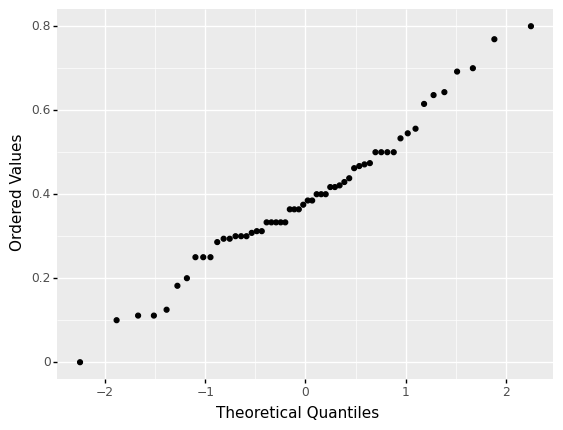

In [12]:
# Calculate theoretical quantiles
tq = stats.probplot(rook_szn, dist="norm")

# Create Dataframe
df = pd.DataFrame(data= {'Theoretical Quantiles': tq[0][0], 
                         "Ordered Values": RJ_season1stats['FG_pct'].sort_values() })

# Create Q-Q plot
print(p9.ggplot(df)+ p9.aes('Theoretical Quantiles', "Ordered Values") + p9.geom_point())
plt.show()

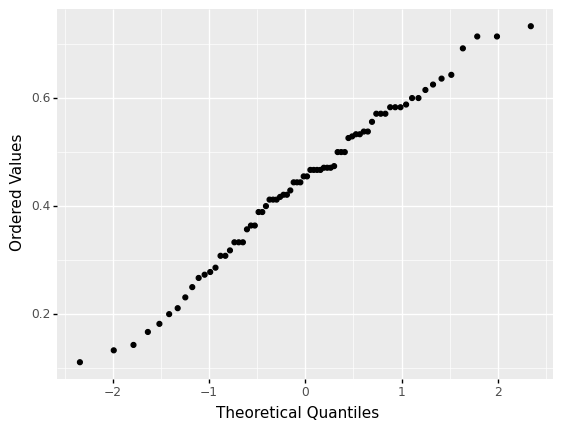

In [13]:
# Calculate theoretical quantiles
tq = stats.probplot(soph_szn, dist="norm")

# Create Dataframe
df = pd.DataFrame(data= {'Theoretical Quantiles': tq[0][0], 
                         "Ordered Values": RJ_season2stats['FG_pct'].sort_values() })

# Create Q-Q plot
print(p9.ggplot(df)+ p9.aes('Theoretical Quantiles', "Ordered Values") + p9.geom_point())
plt.show()

In [14]:
shapiro_RJ1 = stats.shapiro(rook_szn)
print(shapiro_RJ1)

ShapiroResult(statistic=0.9800770878791809, pvalue=0.4789324998855591)


In [15]:
shapiro_RJ2 = stats.shapiro(soph_szn)
print(shapiro_RJ2)

ShapiroResult(statistic=0.9819506406784058, pvalue=0.3900890648365021)


<div class="alert alert-block alert-info">

* The near straight line observed in the `Q-Q plot` and test statistic(s) close to 1.0 confirm that both seasons follow almost exactly normal distribution 


* With a firmer understanding of distribution of each season we can be confident a two sample t-test is best suited to evaluate difference in mean between two seasons 
    
</div>

 Our null hypothesis ${ H_o }$ in our two sample t-test is the means of FG% from season 1 and season 2 for RJ are identical, ${\mu_{FG_rookie}=\mu_{FG_sophmore}}$ and that the observed difference in means was produced by random chance. A difference in the means would indicate that the improved shooting performance in RJ's sophmore season was distinct and unique to that of RJ's rookie year and provide evidence that his enhanced scoring ability.
 
We will use standard alpha value, $\alpha = 0.05$, as our critical value to decide whether or not we reject our null hypothesis. 

In [65]:
# Perform the two-sample t-test
t_result= stats.ttest_ind(RJ_season1stats['FG_pct'], RJ_season2stats['FG_pct'])
print(t_result)

# Test significance
alpha= 0.05
if (t_result[1] < alpha):
    print("RJ Barrett's season 1 and season 2 shooting numbers have different mean FG%")
else: print("No significant difference found")

Ttest_indResult(statistic=-1.798349255438278, pvalue=0.07451587234770526)
No significant difference found


### Evaluating two sample t-test results

<div class="alert alert-block alert-success">


- While our ECDF plot showed promising indicators the mean FG% for RJ's rookie season to his sophmore season were clearly distinct, unfortunately two sample t-test comparing the seasons did not agree

    
- Although it was a very low `p-value = 0.0745`, it did not meet our criteria as significantly significant result. Ultimately, there is no statistically significant evidence that the observed difference in shooting performance from RJ's rookie year to sophmore year was due to more than chance

</div>

### P-value is not the final word 

<div class="alert alert-block alert-info"> 
    
This was a disappointing end to our analysis, until RJ reminded me there is a key componenet to interpreting statistical test resuts that was overlooked - <b>the statistical Power of our two sample t-test</b>

</div>

![IdeaURL](https://media.giphy.com/media/XHqLCH0ljA2YxYHGj4/giphy.gif?cid=ecf05e47f1286zq19j41ju2nafaxm1q80e04kfn7p52a8q80&rid=giphy.gif&ct=g "idea_alert")

## Further interpreation of results - Statistical Power and Effect size

<div class="alert alert-block alert-info">

-  <b>Statistical power</b> is the probability that we will detect an effect under specific conditions 
    - With a power of 0, we have no chance of detecting an effect
    - With a power of 1, we are sure of detecting an effect


- While statistical significance represents how confidence we are there is difference in the means of the two samples, effect size indicates how much of a difference exists
    - Thus, in our example effect size is how much a difference exists between mean FG% of RJ's rookie season and his sophmore season


- Questions to consider: 
    - What effect size <b>would be detectable</b> to our test given the available datasets? 
    - What is the statistical Power of our two sample t-test under these conditions?
    
</div>

In [66]:
# Set parameters
# Assuming a statistical power of our test: 0.80

alpha = 0.05
power = 0.8 # standard Power of a test
samp_size = len(RJ_season1stats['FG_pct'])
ratio = float(len(RJ_season1stats['FG_pct']) / len(RJ_season2stats['FG_pct']))

# Initialize analysis & calculate power
analysis = pwr.TTestIndPower()
effect_result = analysis.solve_power(effect_size=None, power=power, ratio=ratio, nobs1=samp_size, alpha=alpha)
f"The minimum effect size we could detect assuming a Power of 0.80 and \
the available sample sizes is {round(effect_result,3)}"

'The minimum effect size we could detect assuming a Power of 0.80 and the available sample sizes is 0.572'

### Calculating Effect size

- To calculate effect size between FG% means of season 1 and 2 we will use Cohen's d (__[Effect size and Cohen's D](https://en.wikipedia.org/wiki/Effect_size)__)

- Formula for `Cohen's d` to measure effect size:
$$ \frac {\bar{X}_2 - \bar{X}_1}{S_p} $$
    &emsp; and Pooled standard deviation: $$ {S_p} = \sqrt \frac {(n_1-1)S_1^2 + (n_2-1)S_2^2}{n_1+n_2-2} $$


In [67]:
# Create array for each season
rook_szn = RJ_season1stats['FG_pct'].values
soph_szn = RJ_season2stats['FG_pct'].values

# Calculate difference between means and pooled standard deviation
diff = soph_szn.mean() - rook_szn.mean()
n_1 = len(rook_szn)
n_2 = len(soph_szn)
pooledstdev = ma.sqrt(((n_1 - 1)*rook_szn.std()**2 + (n_2 - 1)*soph_szn.std()**2) / ( n_1 + n_2 - 2))

# Calculated Cohen's d
cohend = diff / pooledstdev
f"Our calculated effect size of using Cohen's d: {round(cohend,3)}"

"Our calculated effect size of using Cohen's d: 0.323"

In [68]:
# Set parameters
effect_size = cohend
alpha = 0.05
samp_size = len(RJ_season1stats['FG_pct'])
ratio = float(len(RJ_season1stats['FG_pct']) / len(RJ_season2stats['FG_pct']))

# Initialize analysis & calculate power
analysis = pwr.TTestIndPower()
pwresult = analysis.solve_power(effect_size=effect_size, power=None, ratio=ratio, nobs1=samp_size, alpha=alpha)
F"Power of statistical test with actual sample size(s): {round(pwresult, 3)}"

'Power of statistical test with actual sample size(s): 0.353'

<div class="alert alert-block alert-success">

## Low statistical Power can lead to False Negatives

 - The minimal, detactable effect size based on existing parameters was __0.572__, which is _higher than_ the actual effect size of this comparison, __0.323__.
 
 
 - Although the two sample t-test showed there was no significant difference between RJ Barrett's FG% in Season 1 compared to Season 2, with the sample sizes available the statistical Power of our test was __0.35__, well below the standard threshold of 0.80. 

 
 - Therefore, we cannot exclude the possibility that significant difference is present, but given the limited Power of our test we were unable to detect it and returned a False Negative. With a higher sample size the Power of our test would increase and reduce the risk of Type II error (False Negative)
    
</div>

In [69]:
# Set parameters
effect_size = cohend
alpha = 0.05
samp_size = 150
ratio = 1

# Initialize analysis & calculate power
analysis = pwr.TTestIndPower()
pwresult = analysis.solve_power(effect_size=effect_size, power=None, ratio=ratio, nobs1=samp_size, alpha=alpha)
F"Power of statistical test with increased sample size: {round(pwresult, 3)}"

'Power of statistical test with increased sample size: 0.796'

## Revisit ECDF plot of Rookie Season vs Sophmore Season
 
With the added information of effect size and statistical power, I wanted to take another look at the ECDF plot of FG% distribution for each season. Instead of comparing single season results, the code below resamples FG% from each year and then takes the mean of this resampled array to generate bootstrap replicates of the mean FG% for that season. 

In [70]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(shape=size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [71]:
bs_replicates = draw_bs_reps(rook_szn, np.mean, size = 2000)

In [72]:
bs_replicates_s2 = draw_bs_reps(soph_szn, np.mean, size = 2000)

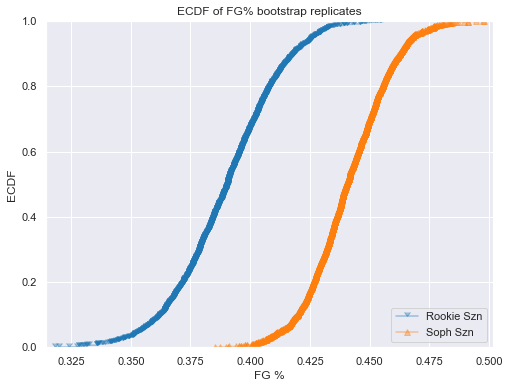

In [73]:
sns.set_context('notebook')
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (8,6))
sns.ecdfplot(data=bs_replicates, marker= 7, alpha= 0.4)
sns.ecdfplot(data=bs_replicates_s2, marker= '^', alpha= 0.4)

plt.xlabel('FG %')
plt.ylabel('ECDF')
plt.title('ECDF of FG% bootstrap replicates')
plt.legend(('Rookie Szn', 'Soph Szn'), loc= 'lower right')
plt.margins(0.02)
plt.show()

<div class="alert alert-block alert-success">

- Graphing the 2000 bootstrap replicates, the difference in mean FG% for RJ's sophmore season against his rookie season is much more pronounced
    
</div>


## Permutation sampling

<div class="alert alert-block alert-info">

- Continuning the analysis beyond the two sample t-test, we implement Permutation sampling methodology. Here the objective is to generate simulated data under the conditions of our null hypothesis 

### Setup
    
- Under the null hypothesis, $H_{o}$, again it is assumed that Season 1 FG% for each game and Season 2 FG% come from an identical distribution, that is, there is no difference in FG% outcomes from RJ's rookie season to sophmore season
    - Since these FG% came from the same distribution we combine FG% results from both seasons, then reassign values to season 1 and season 2 as if there was no difference


 - The chosen test statistic to test this hypothesis is the `difference of mean FG%` for each season


 - Drawing 10,000 permutation samples, our objective is to record how many samples exhibit a difference in means _at least as extreme_ as the one that actually occurred. The number of samples that fit this criteria will represent the likelihood of witnessing our observed difference in means if shooting performances in each season were the same.
    
</div>

In [74]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean FG% for each season: emp_diff_FG
emp_diff_FG = diff_of_means(soph_szn, rook_szn)

perm_replicates = draw_perm_reps(soph_szn, rook_szn,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= emp_diff_FG) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.037


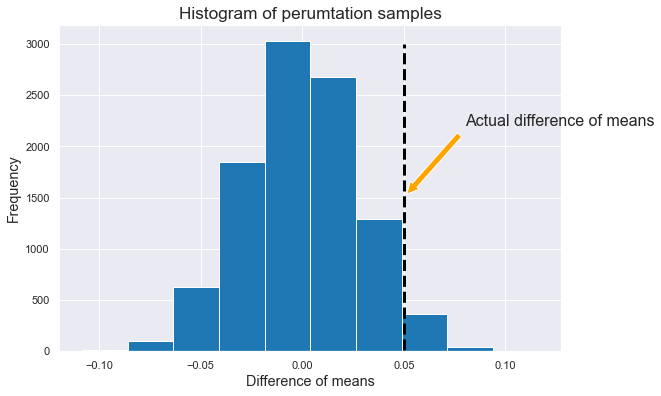

In [190]:
f, ax = plt.subplots(figsize = (9,6))
plt.hist(perm_replicates)
plt.annotate('Actual difference of means', xy=(0.05, 1500), xytext=(.08,2200),
             arrowprops=dict(facecolor='orange', shrink=0.05, width = 6),
             fontsize = 16)

plt.plot([0.05, 0.05], [10, 3000], 'k--', lw=3)

plt.ylabel('Frequency', fontsize = 'large')
plt.xlabel('Difference of means', fontsize = 'large')
plt.title('Histogram of perumtation samples', fontsize = 'x-large')
plt.show()

 ### Evaluating Permutation sampling results



<div class="alert alert-block alert-success">

 - A `p-value = 0.037` indicates that the observed difference in means is about 3.7% if the two seasons were exactly the same, or in other words we have statiscally significant evidence the two seasons are not the same and sophmore season shows true progression for RJ' growth
    
</div>

Although the conflicting results within this analysis might come off underwhelming, a critical factor that is highlighted is the uncertainty that underlies statistical analysis and sports. When combining the two it's difficult to land on any absolute truths. 

Is RJ a bucket? Will he be the next great Knick to bring banners back to the garden? It's hard to say. Yes, he made improvements scoring the ball but more data (read: time) is needed.

Regardless, it's Knicktape.